In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Census income.csv")

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
print("The shape of dataset is:",df.shape)

The shape of dataset is: (32560, 15)


In [8]:
df=df.drop_duplicates()
print(f"rows and columns after dropping duplicates: " ,df.shape)

rows and columns after dropping duplicates:  (32536, 15)


In [9]:
print("Columns and Data Types:")
print(df.dtypes)

Columns and Data Types:
Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [11]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [12]:
categorical_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        categorical_col.append(x)
print(f"object data type columns are:\n",categorical_col)

object data type columns are:
 ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [13]:
numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="float64" or df.dtypes[x]=="int64":
        numerical_cols.append(x)
print(f"\nNumber data type columns are:\n",numerical_cols)


Number data type columns are:
 ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [14]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df.nunique().to_frame("unique values")

,unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


<Axes: >

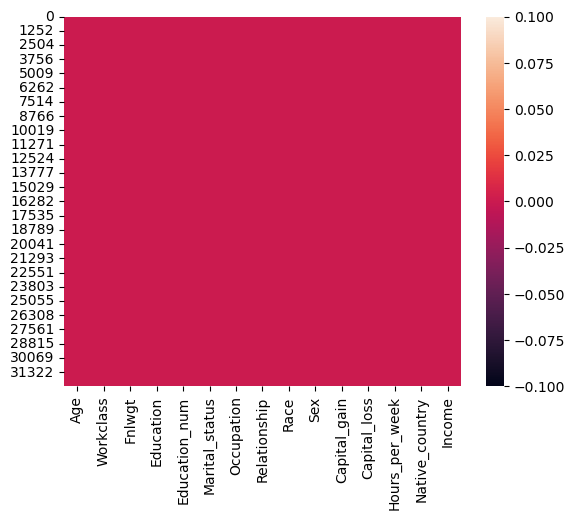

In [16]:
sns.heatmap(df.isnull())

In [17]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype

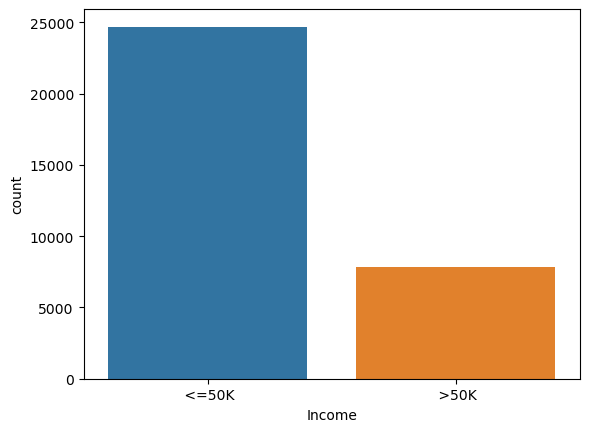

In [18]:
sns.countplot(x='Income',data=df)
plt.show()

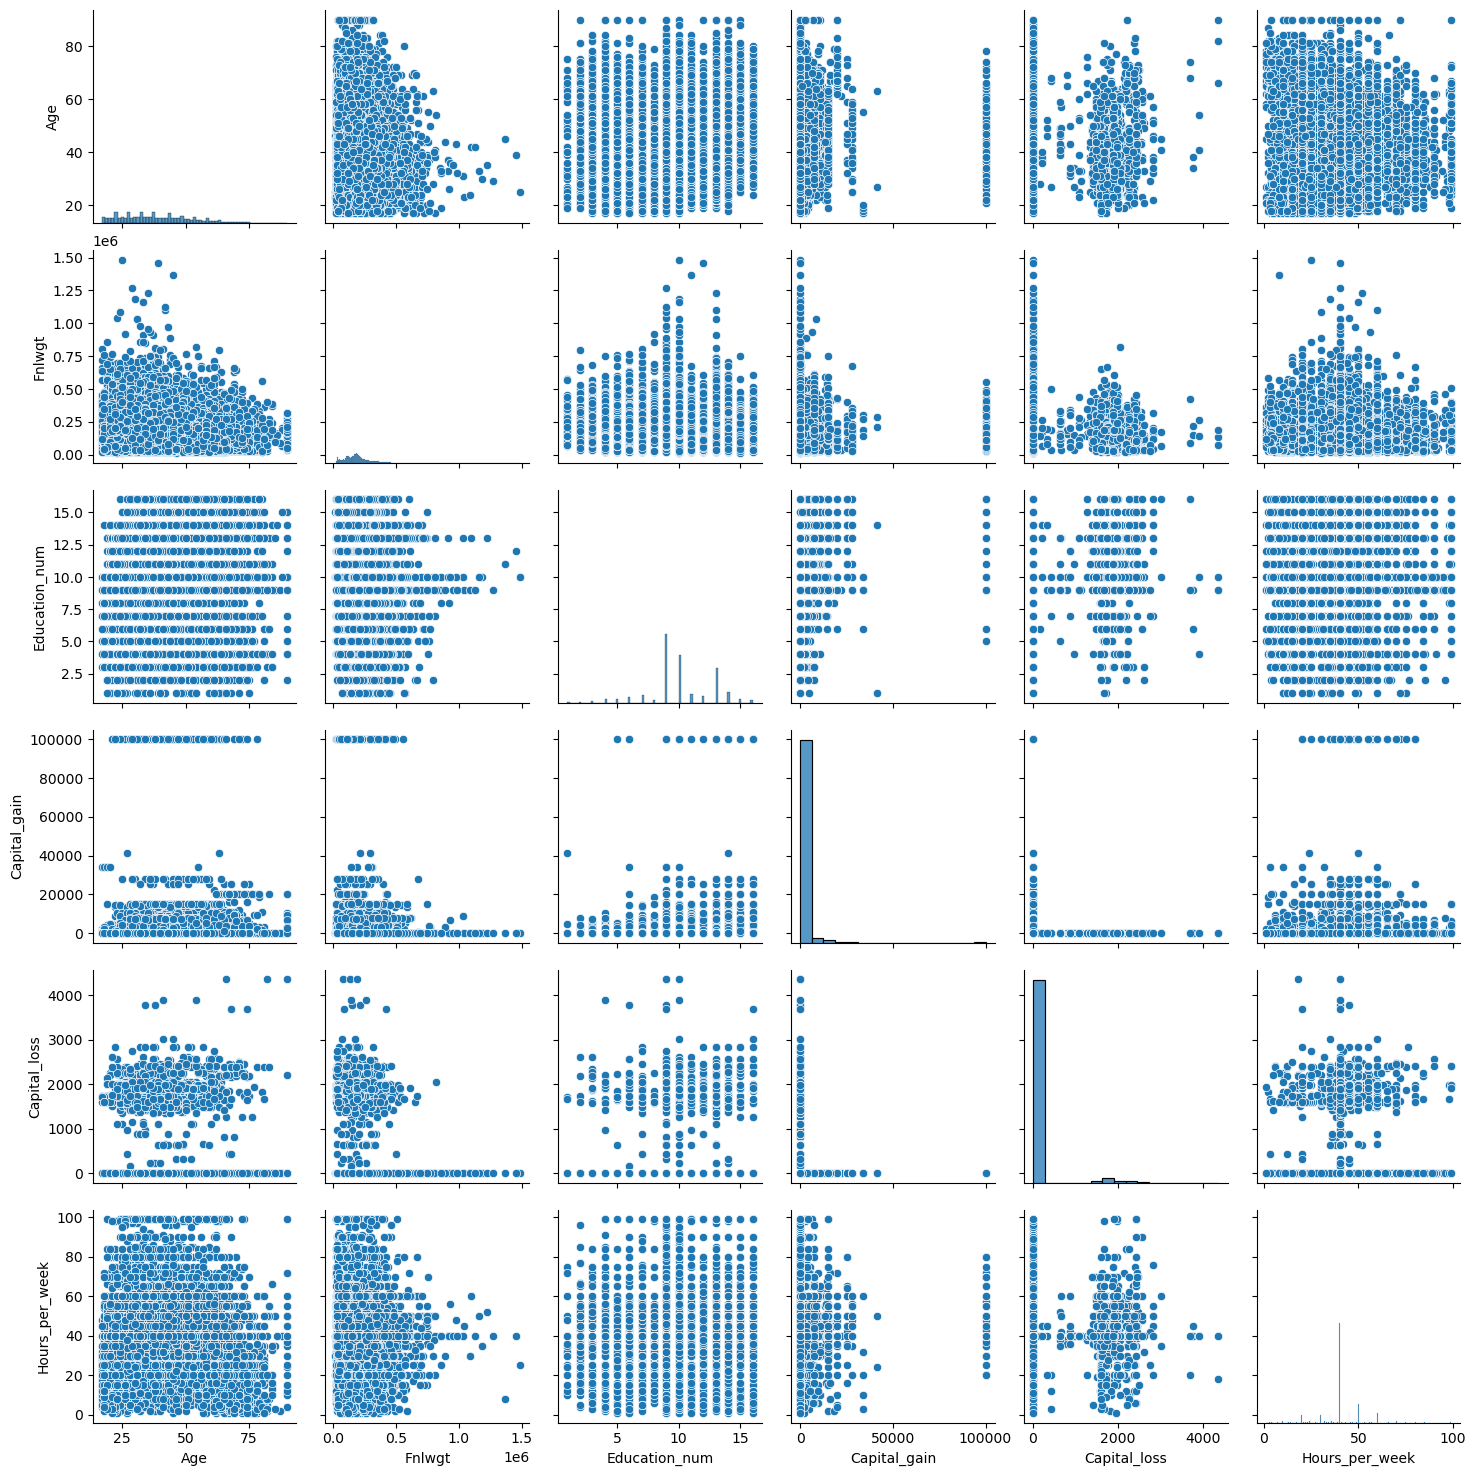

In [19]:
sns.pairplot(df)
plt.show()

In [20]:
label_encoder=LabelEncoder()
for column in categorical_col:
    df[column] = label_encoder.fit_transform(df[column])

In [21]:
df=pd.get_dummies(df)

In [22]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [23]:
x=df.drop('Income',axis=1)
y=df['Income']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
print("Type of x:", type(x))

Type of x: <class 'pandas.core.frame.DataFrame'>


In [26]:
x_array = np.array(x)

In [27]:
print("Shape of x_array:", x_array.shape)

Shape of x_array: (32536, 14)


In [28]:
x_df = pd.DataFrame(x)

In [29]:
print("Shape of x_df:", x_df.shape)

Shape of x_df: (32536, 14)


In [30]:
x_df = df.drop('Income', axis=1)
y=df['Income']

In [31]:
print("Shape of x_df:", x_df.shape)

Shape of x_df: (32536, 14)


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y, test_size=0.2, random_state=42)


In [33]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

y_pred=lr_model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred))

Accuracy of Logistic Regression: 0.7871850030731408
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4961
           1       0.61      0.29      0.39      1547

    accuracy                           0.79      6508
   macro avg       0.71      0.62      0.63      6508
weighted avg       0.76      0.79      0.76      6508

Confusion Matrix for Logistic Regression:
[[4677  284]
 [1101  446]]


In [34]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

y_pred=rf_model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest:", accuracy)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred))

Accuracy of Random Forest: 0.8572526121696373
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4961
           1       0.73      0.63      0.68      1547

    accuracy                           0.86      6508
   macro avg       0.81      0.78      0.79      6508
weighted avg       0.85      0.86      0.85      6508

Confusion Matrix for Random Forest:
[[4610  351]
 [ 578  969]]


In [35]:
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

y_pred=svm_classifier.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy of SVM:", accuracy)
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred))

Accuracy of SVM: 0.7987092808850645
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4961
           1       0.98      0.16      0.27      1547

    accuracy                           0.80      6508
   macro avg       0.89      0.58      0.58      6508
weighted avg       0.84      0.80      0.74      6508

Confusion Matrix for SVM:
[[4957    4]
 [1306  241]]


In [36]:
param_grid={
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(x_test)
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Random Forest Model Evaluation:
Accuracy: 0.8672403196066379
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4961
           1       0.78      0.61      0.69      1547

    accuracy                           0.87      6508
   macro avg       0.83      0.78      0.80      6508
weighted avg       0.86      0.87      0.86      6508

Confusion Matrix:
[[4699  262]
 [ 602  945]]


In [37]:
import joblib

In [38]:
joblib.dump(best_rf_model, 'random_forest_census.joblib')

['random_forest_census.joblib']

In [40]:
loaded_rf_model = joblib.load('random_forest_census.joblib')
result=loaded_rf_model.score(x_test,y_test)
print(result*100)

86.7240319606638
